In [56]:
%pip install tensorflow opencv-python matplotlib filetype

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [57]:
!pip list

Package                      Version
---------------------------- -----------
absl-py                      2.1.0
asttokens                    2.4.1
astunparse                   1.6.3
certifi                      2024.8.30
charset-normalizer           3.4.0
colorama                     0.4.6
comm                         0.2.2
contourpy                    1.3.0
cycler                       0.12.1
debugpy                      1.8.7
decorator                    5.1.1
executing                    2.1.0
filetype                     1.2.0
flatbuffers                  24.3.25
fonttools                    4.54.1
gast                         0.6.0
google-pasta                 0.2.0
grpcio                       1.67.0
h5py                         3.12.1
idna                         3.10
ipykernel                    6.29.5
ipython                      8.28.0
jedi                         0.19.1
jupyter_client               8.6.3
jupyter_core                 5.7.2
keras                        3.6.0


In [58]:
import tensorflow as tf
import os

In [59]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.set_memory_growth(gpu,True)

In [60]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [61]:
data_dir = 'data'

In [62]:
os.listdir(data_dir)

['happy_train', 'sad_tarin']

In [63]:
image_exts = ['png','jpeg','jpg','bnp']

In [64]:
image_exts

['png', 'jpeg', 'jpg', 'bnp']

In [65]:
var = 0;
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path = os.path.join(data_dir,image_class,image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('image not in image exts {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
                print('Issue with image {}'.format(image_path))
                var +=1

print(var)

0


In [66]:
import numpy as np

In [67]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 8490 files belonging to 2 classes.


In [68]:
# generates batches of 32 images
data_iterator = data.as_numpy_iterator()

In [69]:
#get anther batch from iterator
batch = data_iterator.next()

In [70]:
# images represented as arrays and their labels
len(batch)

2

In [71]:
#images as numpy arrays
batch[0]

array([[[[ 13.,  13.,  13.],
         [ 13.,  13.,  13.],
         [ 13.,  13.,  13.],
         ...,
         [ 16.,  16.,  16.],
         [ 16.,  16.,  16.],
         [ 16.,  16.,  16.]],

        [[ 13.,  13.,  13.],
         [ 13.,  13.,  13.],
         [ 13.,  13.,  13.],
         ...,
         [ 16.,  16.,  16.],
         [ 16.,  16.,  16.],
         [ 16.,  16.,  16.]],

        [[ 13.,  13.,  13.],
         [ 13.,  13.,  13.],
         [ 13.,  13.,  13.],
         ...,
         [ 16.,  16.,  16.],
         [ 16.,  16.,  16.],
         [ 16.,  16.,  16.]],

        ...,

        [[ 55.,  55.,  55.],
         [ 55.,  55.,  55.],
         [ 55.,  55.,  55.],
         ...,
         [ 52.,  52.,  52.],
         [ 52.,  52.,  52.],
         [ 52.,  52.,  52.]],

        [[ 55.,  55.,  55.],
         [ 55.,  55.,  55.],
         [ 55.,  55.,  55.],
         ...,
         [ 52.,  52.,  52.],
         [ 52.,  52.,  52.],
         [ 52.,  52.,  52.]],

        [[ 55.,  55.,  55.],
       

In [72]:
# 1 represents sad
# 0 represents happy
batch[1]

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0])

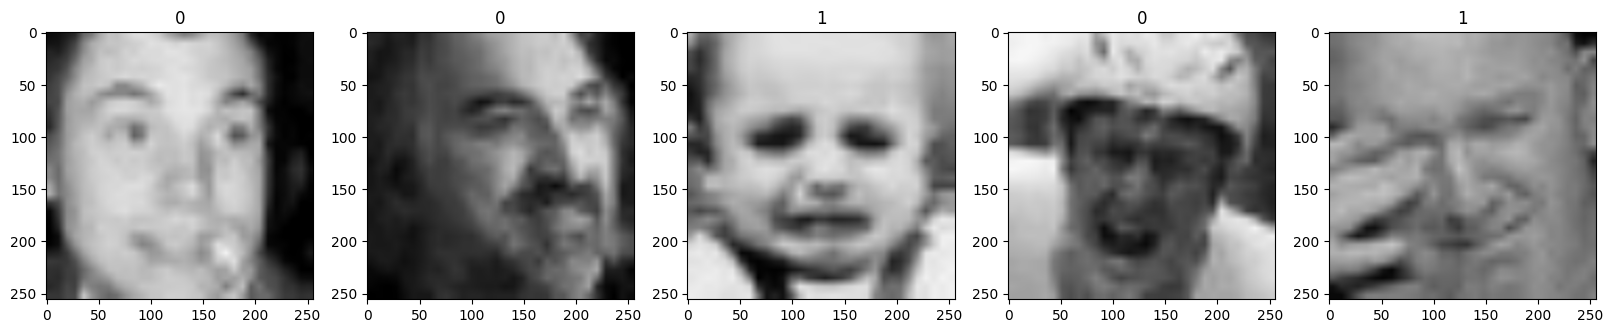

In [73]:
#plot 5 random image from batch using matplotlib
fig , ax = plt.subplots(ncols = 5,figsize = (20,20))
for idx , img in enumerate(batch[0][:5]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [74]:
#Preprocessing

In [75]:
#Using lambda fn to efficiently scale data such that the value lies btw 0 and 1.
data = data.map(lambda x,y : (x/255,y))

In [76]:
scaled_iterator = data.as_numpy_iterator()

In [77]:
batch = scaled_iterator.next()

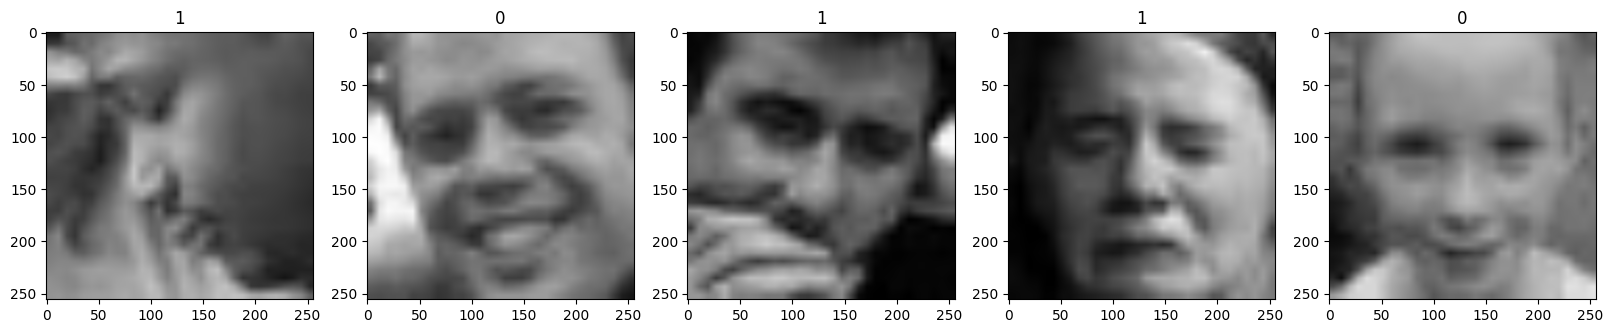

In [78]:
fig , ax = plt.subplots(ncols = 5,figsize = (20,20))
for idx , img in enumerate(batch[0][:5]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [79]:
len(data)

266

In [80]:
train_size =(int) (len(data)*.7)
val_size = (int) (len(data)*.2)+1
test_size = (int) (len(data)*.1)+1

In [81]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [82]:
#Model building

In [83]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten


In [120]:
# create model 1
model1 = Sequential()

In [121]:
#LAYERS
model1.add(Conv2D(16,(3,3),1,activation = 'relu', input_shape = (256,256,3)))
model1.add(MaxPooling2D())

model1.add(Conv2D(32,(3,3),1,activation = 'relu'))
model1.add(MaxPooling2D())

model1.add(Conv2D(16,(3,3),1,activation = 'relu'))
model1.add(MaxPooling2D())

model1.add(Flatten())

model1.add(Dense(256,activation='relu'))
model1.add(Dense(1,activation='sigmoid'))

c:\Users\chara\Desktop\Image_Classifier\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [123]:
model1.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [124]:
model1.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [129]:
logdir = 'log'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model1.fit(train,epochs=10,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/10


186/186 ━━━━━━━━━━━━━━━━━━━━ 53s 286ms/step - accuracy: 0.7674 - loss: 0.4718 - val_accuracy: 0.7228 - val_loss: 0.5508
Epoch 2/10
186/186 ━━━━━━━━━━━━━━━━━━━━ 49s 262ms/step - accuracy: 0.7850 - loss: 0.4483 - val_accuracy: 0.7332 - val_loss: 0.5474
Epoch 3/10
186/186 ━━━━━━━━━━━━━━━━━━━━ 48s 259ms/step - accuracy: 0.8058 - loss: 0.4226 - val_accuracy: 0.7361 - val_loss: 0.5438
Epoch 4/10
186/186 ━━━━━━━━━━━━━━━━━━━━ 49s 262ms/step - accuracy: 0.8336 - loss: 0.3675 - val_accuracy: 0.7106 - val_loss: 0.6888
Epoch 5/10
186/186 ━━━━━━━━━━━━━━━━━━━━ 49s 264ms/step - accuracy: 0.8502 - loss: 0.3474 - val_accuracy: 0.7373 - val_loss: 0.6044
Epoch 6/10
186/186 ━━━━━━━━━━━━━━━━━━━━ 48s 257ms/step - accuracy: 0.8844 - loss: 0.2737 - val_accuracy: 0.7066 - val_loss: 0.7001
Epoch 7/10
186/186 ━━━━━━━━━━━━━━━━━━━━ 48s 258ms/step - accuracy: 0.8901 - loss: 0.2569 - val_accuracy: 0.7280 - val_loss: 0.7491
Epoch 8/10
186/186 ━━━━━━━━━━━━━━━━━━━━ 48s 258ms/step - accuracy: 0.9229 - loss: 0.1800 - val

In [130]:
hist.history

{'accuracy': [0.774193525314331,
  0.7941868305206299,
  0.8109878897666931,
  0.8398857712745667,
  0.8652553558349609,
  0.8988575339317322,
  0.9164986610412598,
  0.9358198642730713,
  0.9539650678634644,
  0.9586693644523621],
 'loss': [0.4682500958442688,
  0.436270147562027,
  0.4040376543998718,
  0.3493630290031433,
  0.3110525608062744,
  0.2407296746969223,
  0.20733900368213654,
  0.15681634843349457,
  0.1151931956410408,
  0.10571564733982086],
 'val_accuracy': [0.7228009104728699,
  0.7332175970077515,
  0.7361111044883728,
  0.7106481194496155,
  0.7372685074806213,
  0.7065972089767456,
  0.7280092835426331,
  0.7274305820465088,
  0.7228009104728699,
  0.7297453880310059],
 'val_loss': [0.5508051514625549,
  0.5473666787147522,
  0.5438071489334106,
  0.6887832880020142,
  0.6043815016746521,
  0.7001389265060425,
  0.7490928769111633,
  0.9496811628341675,
  1.0908961296081543,
  1.1318706274032593]}

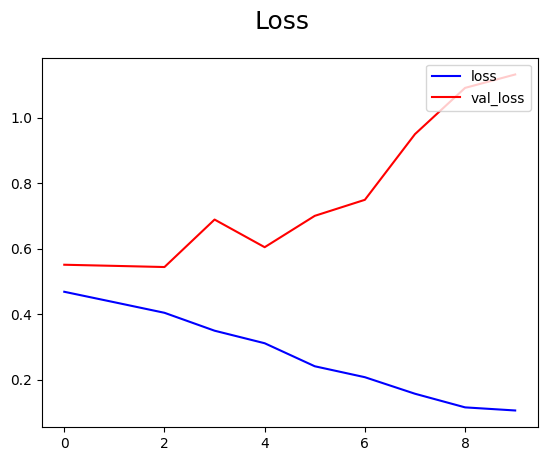

In [131]:
fig = plt.figure()
plt.plot(hist.history['loss'],color='blue',label='loss')
plt.plot(hist.history['val_loss'],color='red',label='val_loss')

fig.suptitle('Loss',fontsize=18)
plt.legend(loc='upper right')
plt.show()

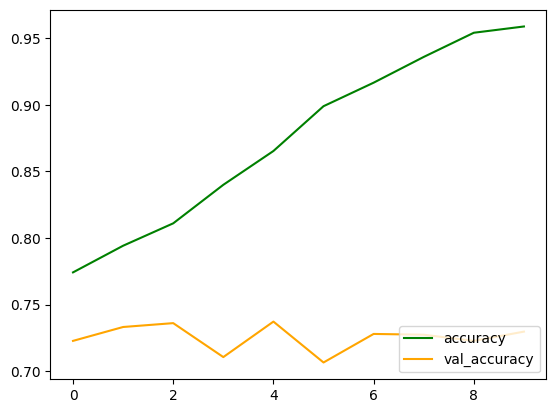

In [132]:
fig = plt.figure()
plt.plot(hist.history['accuracy'],color='green',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='orange',label='val_accuracy')

plt.legend(loc='lower right')
plt.show()

In [94]:
#Performance Evaluation

In [95]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [133]:
precision = Precision()
recall = Recall()
accuracy = BinaryAccuracy()

In [134]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model1.predict(X)
    precision.update_state(y,yhat)
    recall.update_state(y,yhat)
    accuracy.update_state(y,yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


In [135]:
print(f'Precission {precision.result().numpy()}, Recall {recall.result().numpy()}, Accuracy {accuracy.result().numpy()}')

Precission 0.6810810565948486, Recall 0.730434775352478, Accuracy 0.739506185054779


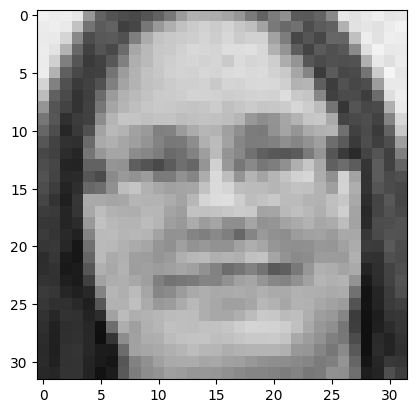

In [136]:
img = cv2.imread('happy_test/gray-0B8Q5SQ0E251.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

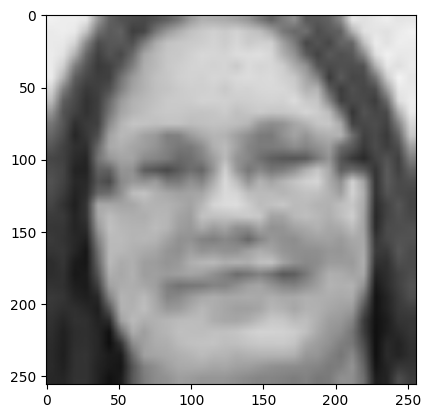

In [137]:
resize = tf.image.resize(img , (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [138]:
#nn doesnt accept single input hence we are encapsulating it into a list
np.expand_dims(resize/255,0)

array([[[[0.94509804, 0.94509804, 0.94509804],
         [0.94509804, 0.94509804, 0.94509804],
         [0.94509804, 0.94509804, 0.94509804],
         ...,
         [0.90588236, 0.90588236, 0.90588236],
         [0.90588236, 0.90588236, 0.90588236],
         [0.90588236, 0.90588236, 0.90588236]],

        [[0.94509804, 0.94509804, 0.94509804],
         [0.94509804, 0.94509804, 0.94509804],
         [0.94509804, 0.94509804, 0.94509804],
         ...,
         [0.90588236, 0.90588236, 0.90588236],
         [0.90588236, 0.90588236, 0.90588236],
         [0.90588236, 0.90588236, 0.90588236]],

        [[0.94509804, 0.94509804, 0.94509804],
         [0.94509804, 0.94509804, 0.94509804],
         [0.94509804, 0.94509804, 0.94509804],
         ...,
         [0.90588236, 0.90588236, 0.90588236],
         [0.90588236, 0.90588236, 0.90588236],
         [0.90588236, 0.90588236, 0.90588236]],

        ...,

        [[0.15686275, 0.15686275, 0.15686275],
         [0.15686275, 0.15686275, 0.15686275]

In [139]:
yhat = model1.predict(np.expand_dims(resize/255,0))
yhat

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


array([[1.0438431e-05]], dtype=float32)

In [140]:
if yhat > 0.5 :
    print(f'Predicted class is sad')
else :
    print(f'Predicted class is happy')

Predicted class is happy


In [145]:
# model 2
model2 = Sequential()

model2.add(Conv2D(16,(3,3),1,activation = 'relu', input_shape = (256,256,3)))
model2.add(MaxPooling2D())

model2.add(Conv2D(16,(3,3),1,activation = 'relu'))
model2.add(MaxPooling2D())

model2.add(Flatten())

model2.add(Dense(256,activation='relu'))
model2.add(Dense(1,activation='sigmoid'))

c:\Users\chara\Desktop\Image_Classifier\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [146]:
model2.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [147]:
model2.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 125, 125, 16)   │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 62, 62, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 61504)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │    15,745,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,748,305 (60.08 MB)

 Trainable params: 15,748,305 (60.08 MB)

 Non-trainable params: 0 (0.00 B)

In [149]:
logdir = 'log'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist2 = model2.fit(train,epochs=10,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/10


186/186 ━━━━━━━━━━━━━━━━━━━━ 52s 279ms/step - accuracy: 0.6116 - loss: 0.6632 - val_accuracy: 0.6412 - val_loss: 0.6147
Epoch 2/10
186/186 ━━━━━━━━━━━━━━━━━━━━ 52s 277ms/step - accuracy: 0.6503 - loss: 0.6262 - val_accuracy: 0.6979 - val_loss: 0.5847
Epoch 3/10
186/186 ━━━━━━━━━━━━━━━━━━━━ 55s 297ms/step - accuracy: 0.6768 - loss: 0.5939 - val_accuracy: 0.7101 - val_loss: 0.5658
Epoch 4/10
186/186 ━━━━━━━━━━━━━━━━━━━━ 54s 291ms/step - accuracy: 0.7008 - loss: 0.5754 - val_accuracy: 0.6615 - val_loss: 0.6170
Epoch 5/10
186/186 ━━━━━━━━━━━━━━━━━━━━ 52s 278ms/step - accuracy: 0.6967 - loss: 0.5754 - val_accuracy: 0.6858 - val_loss: 0.5706
Epoch 6/10
186/186 ━━━━━━━━━━━━━━━━━━━━ 54s 291ms/step - accuracy: 0.7034 - loss: 0.5665 - val_accuracy: 0.6973 - val_loss: 0.5790
Epoch 7/10
186/186 ━━━━━━━━━━━━━━━━━━━━ 56s 300ms/step - accuracy: 0.7238 - loss: 0.5374 - val_accuracy: 0.6829 - val_loss: 0.5784
Epoch 8/10
186/186 ━━━━━━━━━━━━━━━━━━━━ 54s 291ms/step - accuracy: 0.7452 - loss: 0.5052 - val

In [152]:
hist2.history

{'accuracy': [0.6290322542190552,
  0.6609542965888977,
  0.6801075339317322,
  0.6952285170555115,
  0.707325279712677,
  0.7108535170555115,
  0.7279905676841736,
  0.7486559152603149,
  0.7683131694793701,
  0.7856183052062988],
 'loss': [0.6514223217964172,
  0.6207338571548462,
  0.5914871692657471,
  0.5777171850204468,
  0.5696609020233154,
  0.5581481456756592,
  0.5299522876739502,
  0.50020831823349,
  0.4724462330341339,
  0.44111230969429016],
 'val_accuracy': [0.6412037014961243,
  0.6979166865348816,
  0.7100694179534912,
  0.6614583134651184,
  0.6857638955116272,
  0.6973379850387573,
  0.6828703880310059,
  0.6909722089767456,
  0.7060185074806213,
  0.7141203880310059],
 'val_loss': [0.6146530508995056,
  0.5846655368804932,
  0.5657820701599121,
  0.6170225739479065,
  0.5706301331520081,
  0.5789617896080017,
  0.5784401893615723,
  0.5833461284637451,
  0.5825430154800415,
  0.5807287096977234]}

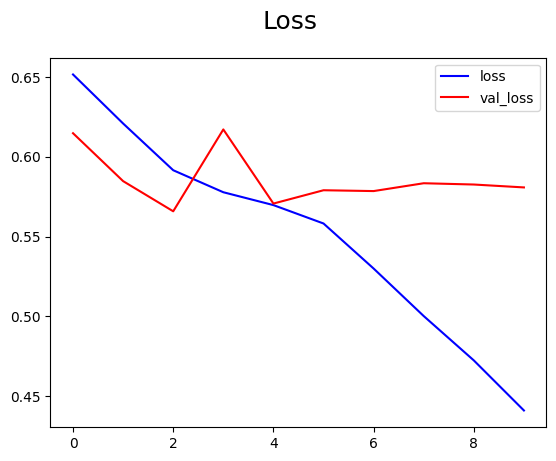

In [155]:
fig = plt.figure()
plt.plot(hist2.history['loss'],color='blue',label='loss')
plt.plot(hist2.history['val_loss'],color='red',label='val_loss')

fig.suptitle('Loss',fontsize=18)
plt.legend(loc='upper right')
plt.show()

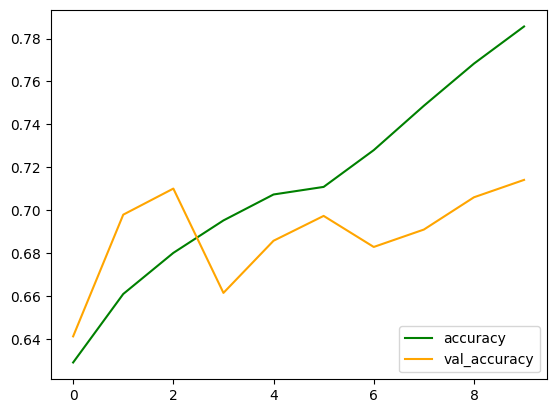

In [156]:
fig = plt.figure()
plt.plot(hist2.history['accuracy'],color='green',label='accuracy')
plt.plot(hist2.history['val_accuracy'],color='orange',label='val_accuracy')

plt.legend(loc='lower right')
plt.show()

In [157]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model2.predict(X)
    precision.update_state(y,yhat)
    recall.update_state(y,yhat)
    accuracy.update_state(y,yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


In [158]:
print(f'Precission {precision.result().numpy()}, Recall {recall.result().numpy()}, Accuracy {accuracy.result().numpy()}')

Precission 0.7057822942733765, Recall 0.5937052965164185, Accuracy 0.7179012298583984


In [201]:
from keras.layers import Dropout

In [213]:
# model 3
model3 = Sequential()

model3.add(Conv2D(16,(3,3),activation = 'relu',padding='same', input_shape = (256,256,3)))
model3.add(MaxPooling2D())
model3.add(Dropout(0.25))

# model3.add(Conv2D(16,(3,3),1,activation = 'relu',padding='same'))
model3.add(Conv2D(16,(3,3),activation = 'relu',padding='same'))
model3.add(MaxPooling2D())
model3.add(Dropout(0.25))

model3.add(Flatten())

model3.add(Dense(1,activation='sigmoid'))

c:\Users\chara\Desktop\Image_Classifier\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [214]:
model3.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [215]:
model3.summary()

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_40 (Conv2D)              │ (None, 256, 256, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 128, 128, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128, 128, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 128, 128, 16)   │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_16 (Flatten)            │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │        65,537 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 68,305 (266.82 KB)

 Trainable params: 68,305 (266.82 KB)

 Non-trainable params: 0 (0.00 B)

In [220]:
logdir = 'log'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist3 = model3.fit(train,epochs=50,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/50


186/186 ━━━━━━━━━━━━━━━━━━━━ 39s 208ms/step - accuracy: 0.7272 - loss: 0.5499 - val_accuracy: 0.6863 - val_loss: 0.5926
Epoch 2/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 38s 206ms/step - accuracy: 0.7239 - loss: 0.5510 - val_accuracy: 0.6887 - val_loss: 0.5860
Epoch 3/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 39s 209ms/step - accuracy: 0.7171 - loss: 0.5485 - val_accuracy: 0.6968 - val_loss: 0.5794
Epoch 4/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 39s 206ms/step - accuracy: 0.7247 - loss: 0.5424 - val_accuracy: 0.6840 - val_loss: 0.5909
Epoch 5/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 38s 206ms/step - accuracy: 0.7327 - loss: 0.5347 - val_accuracy: 0.6869 - val_loss: 0.5896
Epoch 6/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 39s 208ms/step - accuracy: 0.7333 - loss: 0.5401 - val_accuracy: 0.6910 - val_loss: 0.6063
Epoch 7/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 40s 212ms/step - accuracy: 0.7269 - loss: 0.5470 - val_accuracy: 0.7031 - val_loss: 0.5787
Epoch 8/50
186/186 ━━━━━━━━━━━━━━━━━━━━ 39s 208ms/step - accuracy: 0.7431 - loss: 0.5343 - val

KeyboardInterrupt: 

In [217]:
hist3.history

{'accuracy': [0.5981183052062988,
  0.6454973220825195,
  0.6886760592460632,
  0.698924720287323,
  0.7078292965888977,
  0.7106854915618896,
  0.7158938050270081,
  0.710349440574646,
  0.7163978219032288,
  0.7142137289047241],
 'loss': [0.7026531100273132,
  0.6297680139541626,
  0.6020306944847107,
  0.5866478681564331,
  0.5775048732757568,
  0.5667868852615356,
  0.5645697116851807,
  0.5650442838668823,
  0.5555235147476196,
  0.559188187122345],
 'val_accuracy': [0.6168981194496155,
  0.7094907164573669,
  0.6180555820465088,
  0.6875,
  0.6880787014961243,
  0.6903935074806213,
  0.6770833134651184,
  0.6961805820465088,
  0.6875,
  0.6695601940155029],
 'val_loss': [0.6435371041297913,
  0.638742208480835,
  0.6689024567604065,
  0.5902944207191467,
  0.5939149260520935,
  0.5985942482948303,
  0.6133363246917725,
  0.5940852165222168,
  0.6036385297775269,
  0.6187357902526855]}

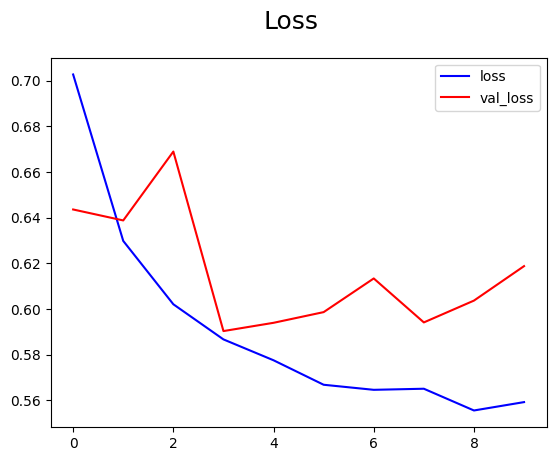

In [218]:
fig = plt.figure()
plt.plot(hist3.history['loss'],color='blue',label='loss')
plt.plot(hist3.history['val_loss'],color='red',label='val_loss')

fig.suptitle('Loss',fontsize=18)
plt.legend(loc='upper right')
plt.show()

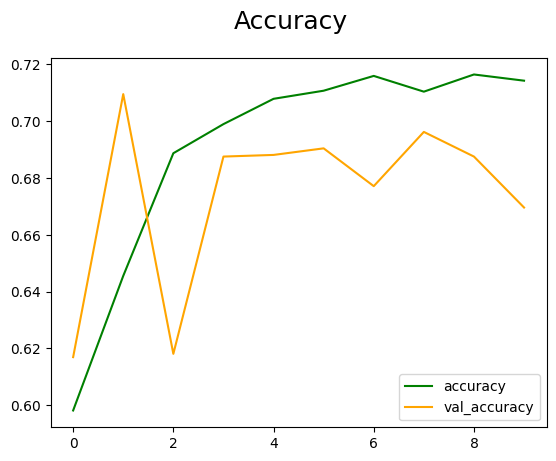

In [219]:
fig = plt.figure()
plt.plot(hist3.history['accuracy'],color='green',label='accuracy')
plt.plot(hist3.history['val_accuracy'],color='orange',label='val_accuracy')

fig.suptitle('Accuracy',fontsize=18)
plt.legend(loc='lower right')
plt.show()

In [185]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model3.predict(X)
    precision.update_state(y,yhat)
    recall.update_state(y,yhat)
    accuracy.update_state(y,yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


In [ ]:
print(f'Precission {precision.result().numpy()}, Recall {recall.result().numpy()}, Accuracy {accuracy.result().numpy()}')

Precission 0.6958661675453186, Recall 0.5145560503005981, Accuracy 0.6987654566764832
